<hr style="height:2px; background-color: black;">
<div style="text-align: left; display: inline-block; width: 50%;">Vincent Earl Andrews</div><div style="text-align: right; display: inline-block; width: 50%;">Due: March 15, 2024</div>                                           
                                                  
<h3 align="center">Machine Learning: Homework 3</h3>
<hr style="height:2px; background-color: black;">

In [67]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
import numpy as np
import scipy
import matplotlib.pyplot as plt
#problem 2 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
#problem 3
from sklearn.tree import DecisionTreeClassifier, plot_tree
#problem 5
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
#problem
from sklearn.inspection import permutation_importance

Problem 1: Use pairplots to analyze the feature distributions and output labels. Note any strong patterns you observe. (Use only the 14 main features listed.)

In [60]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
data = pd.DataFrame(heart_disease.data.original)
data1 = data.dropna()

# seperate data into X, y
X = data1.drop(['num'], axis = 1)
y = data1['num']

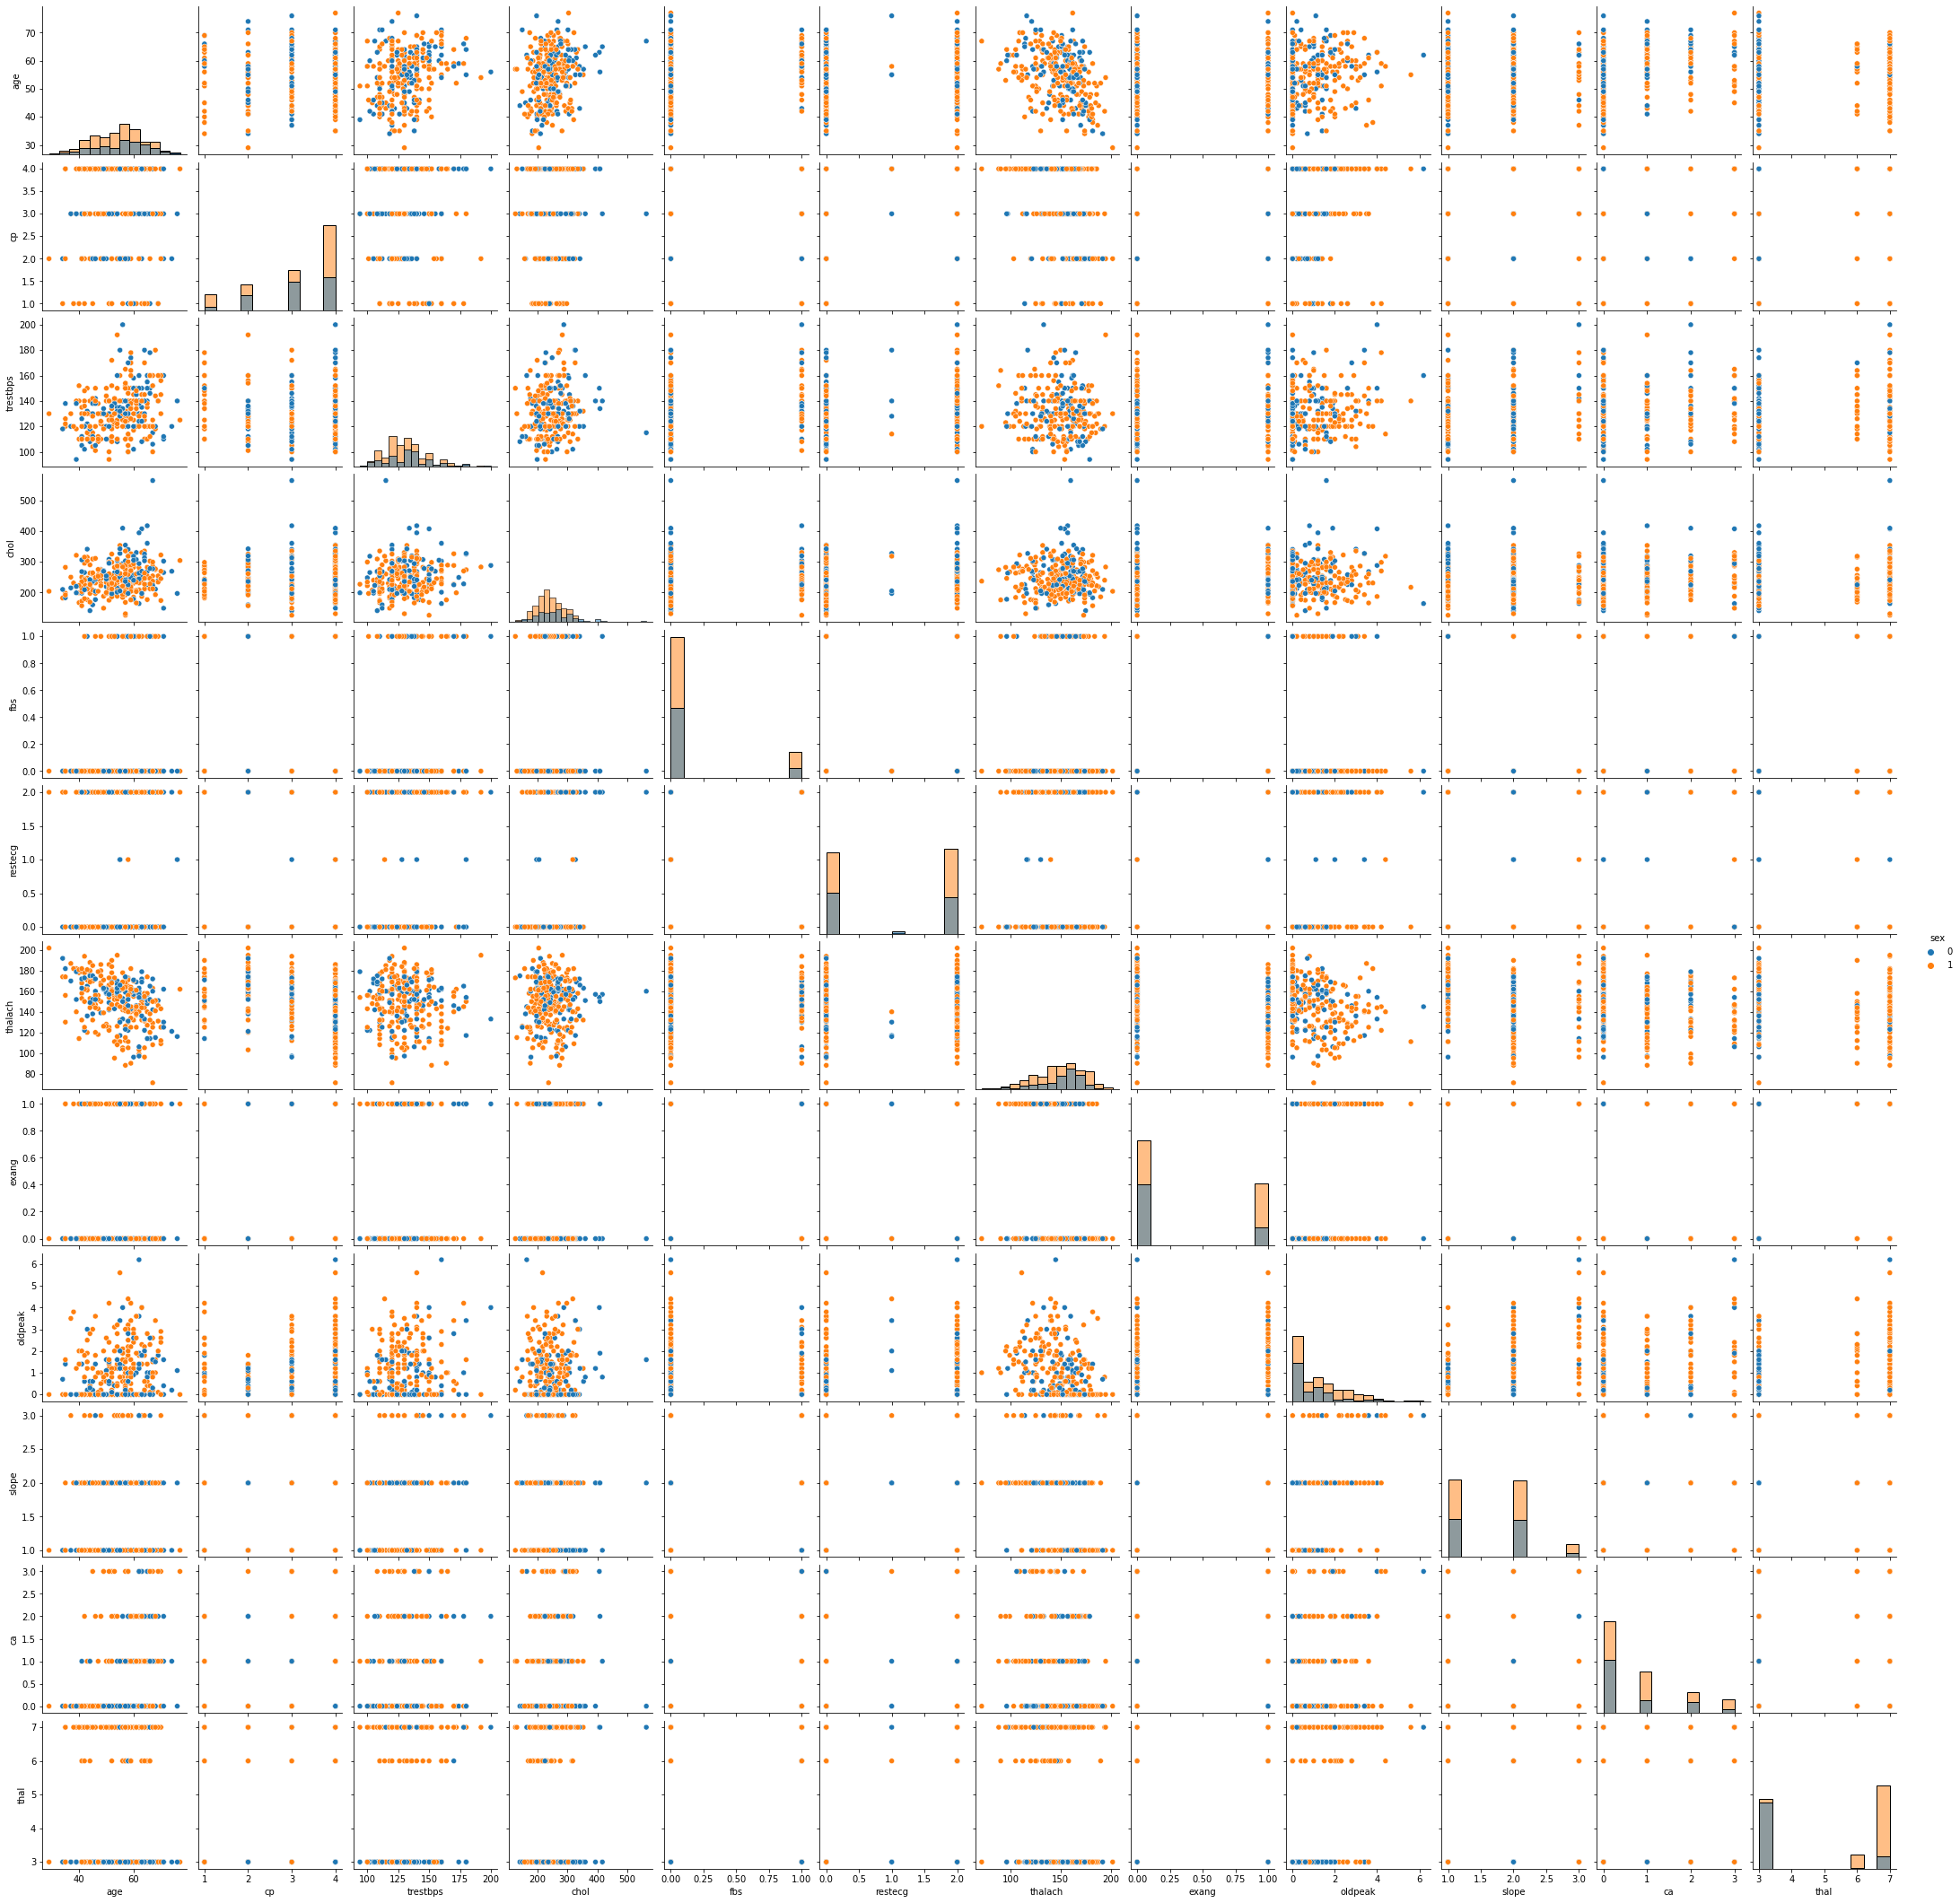

In [3]:
sns.pairplot(X, hue = 'sex',diag_kind="hist")
plt.show()

Above are the pairplots produced for the 14 attributes in the dataset, the blue values correspond to the female classification (sex = 0), while the orange dots are the male classification (sex = 1). 

<b>Data Trends:</b> <br>
-  chol (cholesterol) and thalach (max heart rate) have a slight positive correlation with age
-  thalach (max heart rate) has a significant negative correlation with age (older people have a slower heart rate on average)
-  oldpeak (ST depression induced by exercise relative to rest) appears normally distributed with age and normally distributed    with thalach (max heart rate)

Overall, cholesterol levels seem to increase with age and the maximum heart rate seems to decrease with age. These two attributes have the most dominant features in the pairplots above.

Problem 2: Do a comparison of the naive Bayes' classifier, logistic regression, LDA, QDA, and K-nearest neighbors on the same train/test split.

In [62]:
# turn into array and preprocess data
x = X.to_numpy()
x = x.astype(float)

# Split data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 69)

Naive Bayes Classifier


Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.87      0.89        60
           1       0.27      0.23      0.25        13
           2       0.11      0.12      0.12         8
           3       0.43      0.50      0.46         6
           4       0.00      0.00      0.00         3

    accuracy                           0.66        90
   macro avg       0.34      0.34      0.34        90
weighted avg       0.69      0.66      0.67        90


Confusion Matrix:



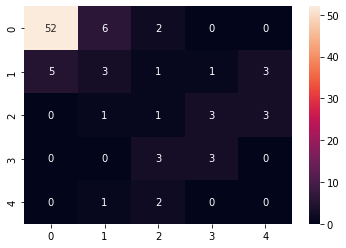

In [63]:
Bayes = GaussianNB()
Bayes.fit(xtrain, ytrain)
ypred_B = Bayes.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_B))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_B), annot = True)
plt.show()

logistic Regression


Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.15      0.15      0.15        13
           2       0.00      0.00      0.00         8
           3       0.29      0.33      0.31         6
           4       0.00      0.00      0.00         3

    accuracy                           0.64        90
   macro avg       0.26      0.28      0.27        90
weighted avg       0.61      0.64      0.63        90


Confusion Matrix:



C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

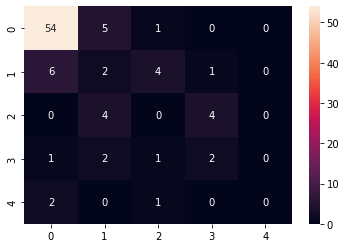

In [6]:
LG = LogisticRegression()
LG.fit(xtrain, ytrain)
ypred_LG = LG.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_LG))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_LG), annot = True)
plt.show()

Linear Discriminant Analysis (LDA)


Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.83      0.86        60
           1       0.15      0.15      0.15        13
           2       0.00      0.00      0.00         8
           3       0.25      0.33      0.29         6
           4       0.00      0.00      0.00         3

    accuracy                           0.60        90
   macro avg       0.26      0.26      0.26        90
weighted avg       0.63      0.60      0.62        90


Confusion Matrix:



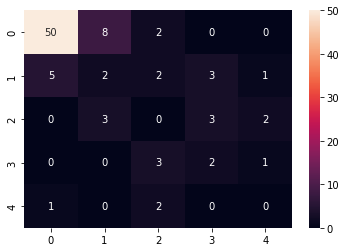

In [7]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(xtrain, ytrain)
ypred_LDA = LDA.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_LDA))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_LDA), annot = True)
plt.show()

C:\Users\vince\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `


Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.82      0.84        60
           1       0.09      0.08      0.08        13
           2       0.23      0.38      0.29         8
           3       0.40      0.67      0.50         6
           4       0.00      0.00      0.00         3

    accuracy                           0.63        90
   macro avg       0.32      0.39      0.34        90
weighted avg       0.64      0.63      0.63        90


Confusion Matrix:



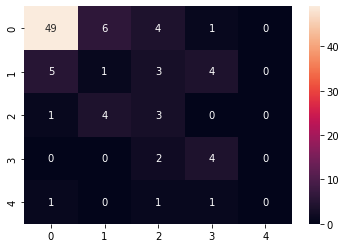

In [8]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(xtrain, ytrain)
ypred_QDA = QDA.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_QDA))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_QDA), annot = True)
plt.show()

C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.73      0.73        60
           1       0.12      0.15      0.14        13
           2       0.25      0.25      0.25         8
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         3

    accuracy                           0.54        90
   macro avg       0.26      0.26      0.26        90
weighted avg       0.53      0.54      0.54        90


Confusion Matrix:



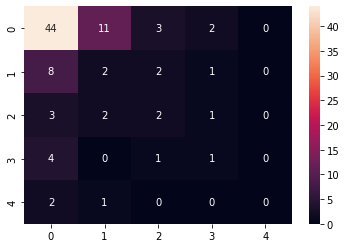

In [9]:
k = KNeighborsClassifier()
k.fit(xtrain, ytrain)
ypred_k = k.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_k))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_k), annot = True)
plt.show()

Problem 3: Train a decision tree classifier to classify which people have heart disease and test it on a test set.

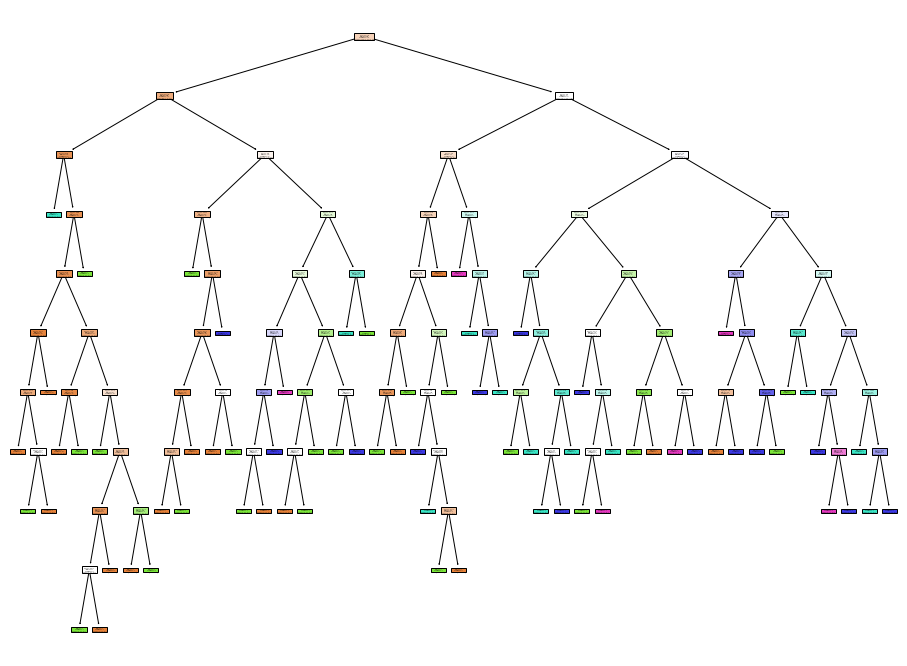

In [10]:
# plot a tree fit to the whole dataset
tree = DecisionTreeClassifier().fit(xtrain, ytrain)
plt.figure(figsize=(16,12))
plot_tree(tree, filled=True, feature_names = heart_disease.feature_names, class_names = heart_disease.target_names)
plt.show()


Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.70      0.74        60
           1       0.18      0.23      0.20        13
           2       0.20      0.12      0.15         8
           3       0.10      0.17      0.12         6
           4       0.00      0.00      0.00         3

    accuracy                           0.52        90
   macro avg       0.25      0.24      0.24        90
weighted avg       0.57      0.52      0.54        90


Confusion Matrix:



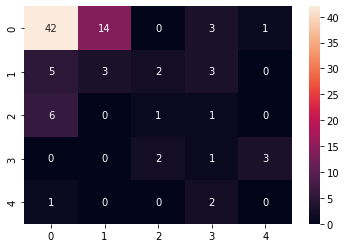

In [11]:
ypred_tree = tree.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_tree))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_tree), annot = True)
plt.show()

Problem 4: Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

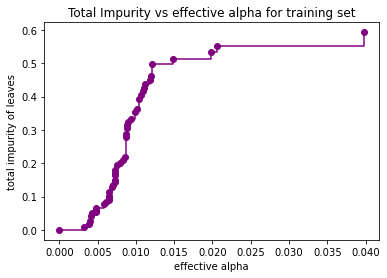

In [12]:
# pruning
prune = tree.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = prune.ccp_alphas, prune.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", color ='purple')
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

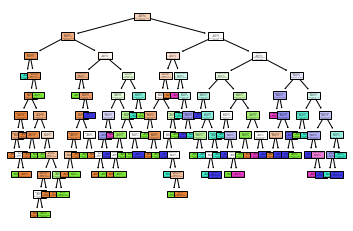

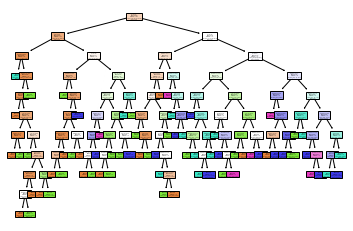

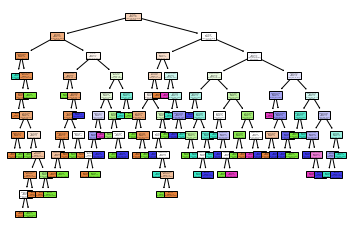

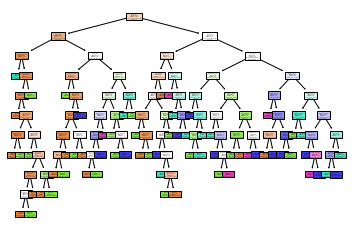

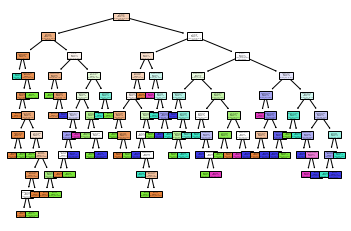

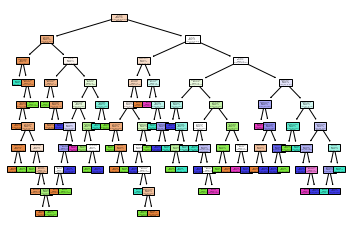

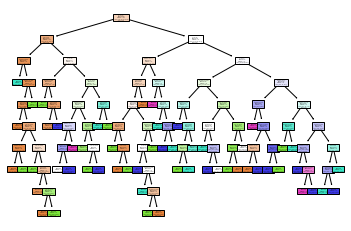

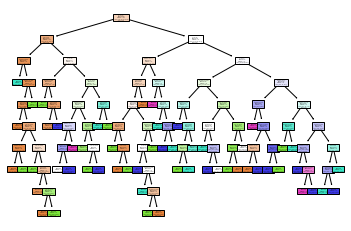

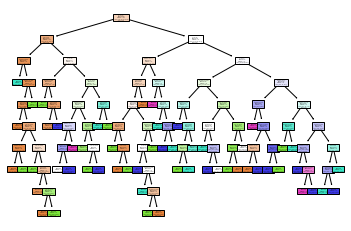

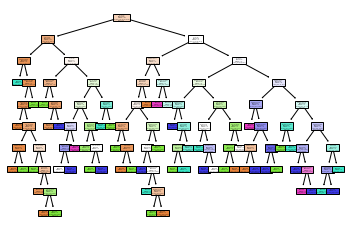

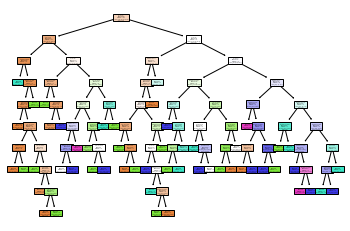

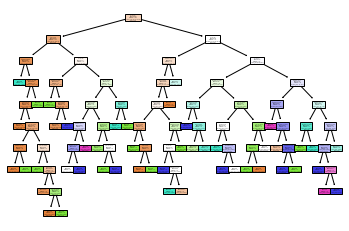

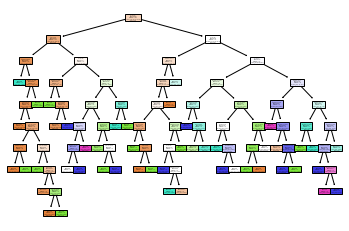

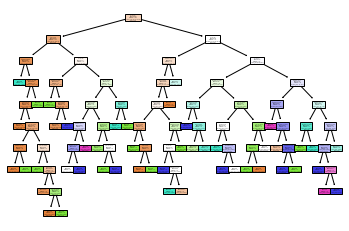

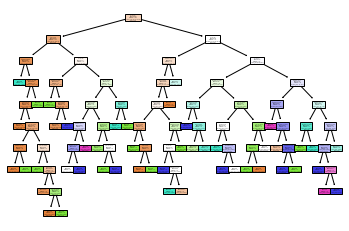

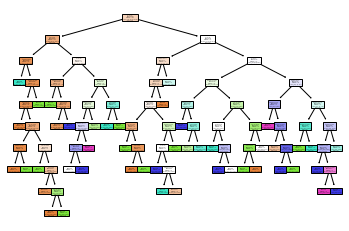

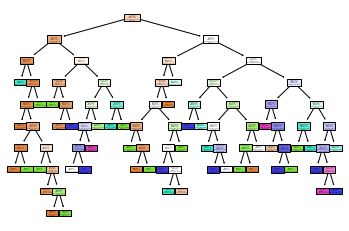

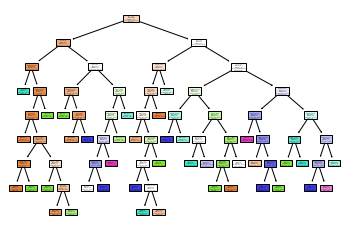

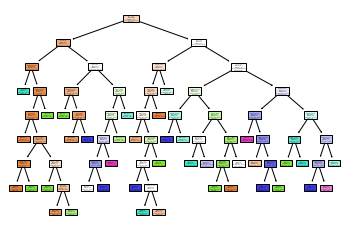

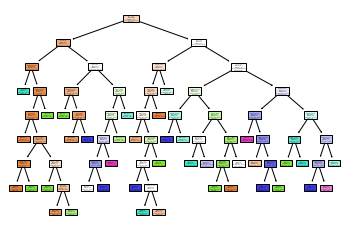

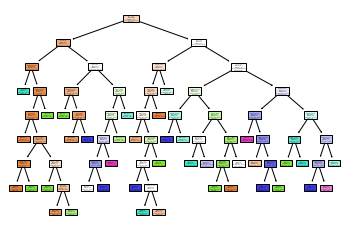

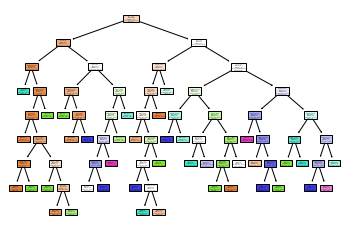

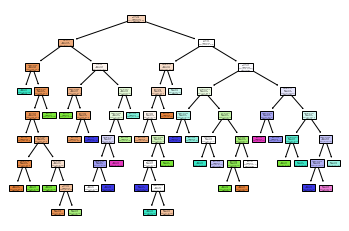

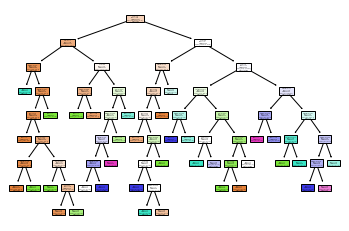

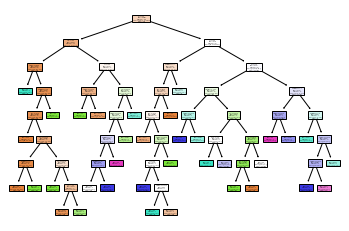

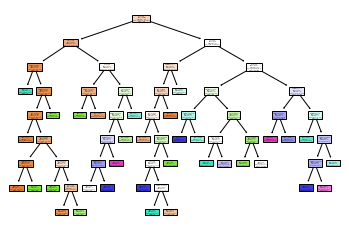

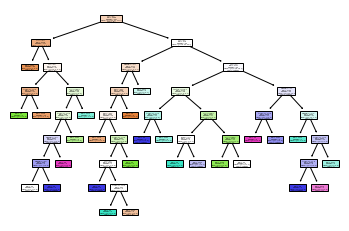

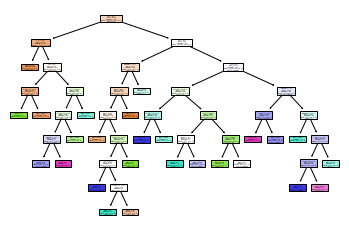

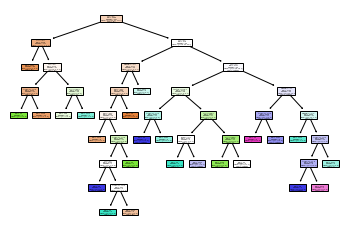

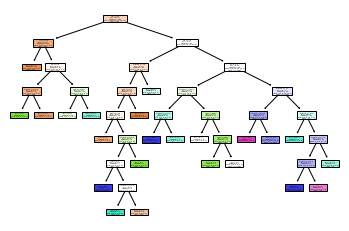

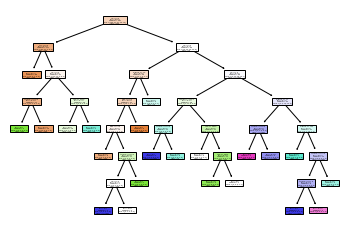

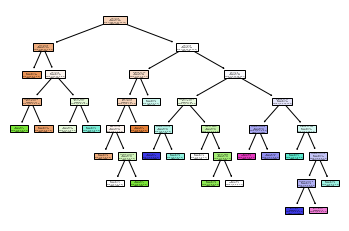

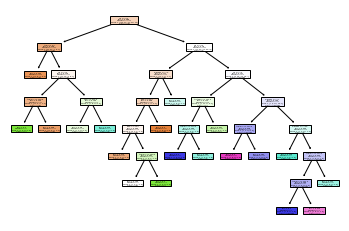

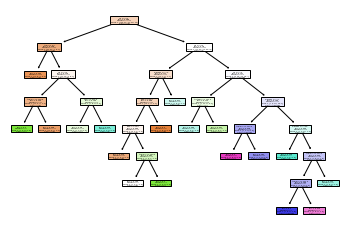

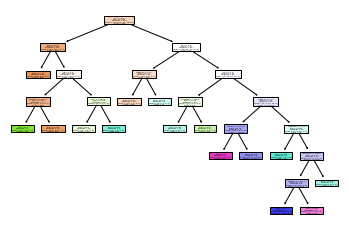

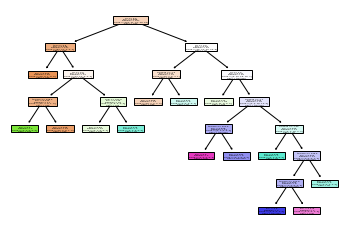

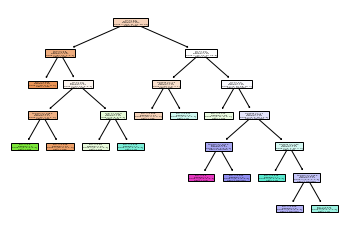

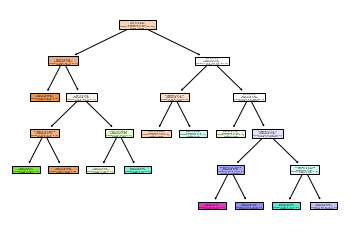

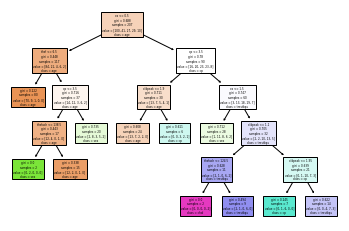

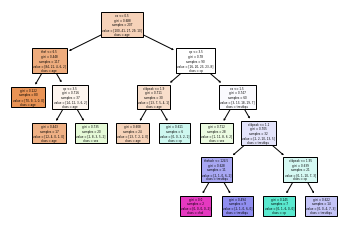

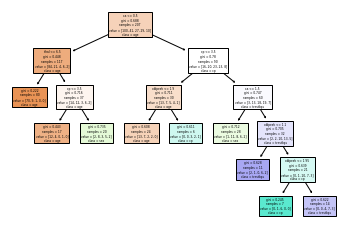

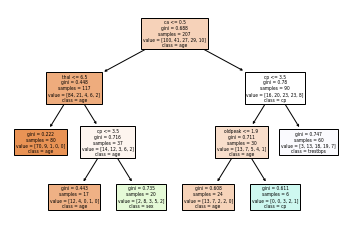

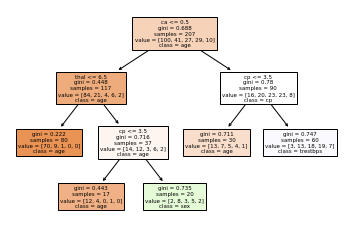

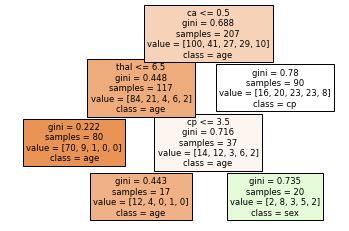

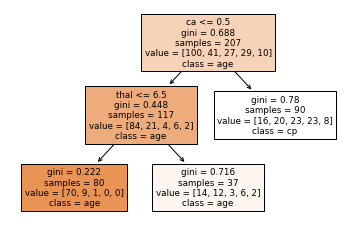

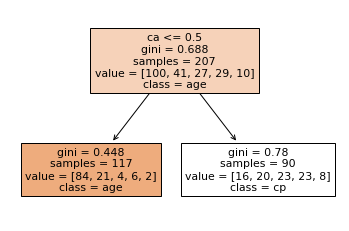

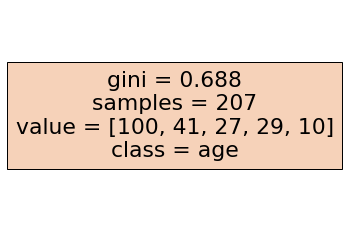

In [14]:
# train decision tree using effective alphas
vals = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(xtrain, ytrain)
    plot_tree(tree, filled=True, feature_names = heart_disease.data.features.columns, class_names = heart_disease.data.features.columns)
    plt.show()

The final tree gives a gini of 0.688 which means there is a 69% chance of incorrectly predicting if someone has heart disease with the pruned tree. Given that there are previous prunes that have a lower gini, the resulting tree is likely over-pruned.

Problem 5: XGBoost

I selected XGBoost over the random decision tree method since XGBoost typically achieves higher accuracy than random trees. The addition of parameter tuning allows more control over the model as well. 

[0]	validation_0-mlogloss:1.29548
[1]	validation_0-mlogloss:1.10083
[2]	validation_0-mlogloss:1.01454
[3]	validation_0-mlogloss:0.94423
[4]	validation_0-mlogloss:0.88033
[5]	validation_0-mlogloss:0.86433
[6]	validation_0-mlogloss:0.85751
[7]	validation_0-mlogloss:0.83462
[8]	validation_0-mlogloss:0.81222
[9]	validation_0-mlogloss:0.80758
[10]	validation_0-mlogloss:0.80516
[11]	validation_0-mlogloss:0.80018
[12]	validation_0-mlogloss:0.81141
[13]	validation_0-mlogloss:0.80652
[14]	validation_0-mlogloss:0.79891
[15]	validation_0-mlogloss:0.80317
[16]	validation_0-mlogloss:0.80659
[17]	validation_0-mlogloss:0.79929
[18]	validation_0-mlogloss:0.80832
[19]	validation_0-mlogloss:0.80821
[20]	validation_0-mlogloss:0.81181
[21]	validation_0-mlogloss:0.81460
[22]	validation_0-mlogloss:0.81574
[23]	validation_0-mlogloss:0.82148
[24]	validation_0-mlogloss:0.82000
[25]	validation_0-mlogloss:0.82391
[26]	validation_0-mlogloss:0.83356
[27]	validation_0-mlogloss:0.83070
[28]	validation_0-mlogloss:0.8

<Figure size 432x288 with 0 Axes>

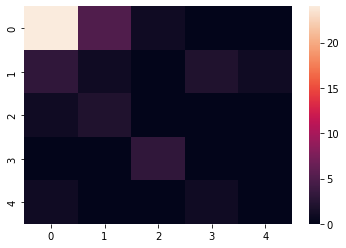

<Figure size 432x288 with 0 Axes>

In [64]:
# not tuned XGBoost
# split into another val set
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size = 0.5)
xgb = XGBClassifier(n_jobs = -1, seed = 69)

# fit training
xgb.fit(xtrain, ytrain, eval_set = [(xval, yval)])
ypred_xgb_train = xgb.predict(xtrain)

# check train set
print('\nTraining Classification Report:\n\n', classification_report(ytrain, ypred_xgb_train))

# predict test
ypred_xgb_test = xgb.predict(xtest)

# results
print('\nTesting Classification Report:\n\n', classification_report(ytest, ypred_xgb_test))
print('\nTesting Confusion Matrix:\n')
sns.heatmap(confusion_matrix(ytest, ypred_xgb_test))
plt.figure()

[0]	validation_0-mlogloss:1.34022
[1]	validation_0-mlogloss:1.21850
[2]	validation_0-mlogloss:1.17196
[3]	validation_0-mlogloss:1.10432
[4]	validation_0-mlogloss:1.05384
[5]	validation_0-mlogloss:1.04556
[6]	validation_0-mlogloss:1.05229
[7]	validation_0-mlogloss:1.04064
[8]	validation_0-mlogloss:1.05676
[9]	validation_0-mlogloss:1.07369
[10]	validation_0-mlogloss:1.06799
[11]	validation_0-mlogloss:1.05979
[12]	validation_0-mlogloss:1.07142
[13]	validation_0-mlogloss:1.06906
[14]	validation_0-mlogloss:1.07487
[15]	validation_0-mlogloss:1.07374
[16]	validation_0-mlogloss:1.05833
[17]	validation_0-mlogloss:1.07855
[18]	validation_0-mlogloss:1.07891
[19]	validation_0-mlogloss:1.09261
[20]	validation_0-mlogloss:1.10532
[21]	validation_0-mlogloss:1.11844
[22]	validation_0-mlogloss:1.11497
[23]	validation_0-mlogloss:1.11759
[24]	validation_0-mlogloss:1.13740
[25]	validation_0-mlogloss:1.12724
[26]	validation_0-mlogloss:1.13383
[27]	validation_0-mlogloss:1.14473
[28]	validation_0-mlogloss:1.1

C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


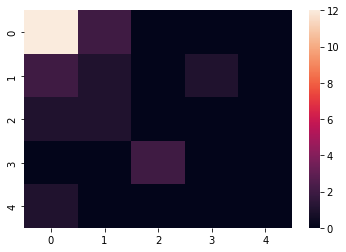

In [65]:
# tuned XGBoost 
parameters = {'max_depth': [1, 5, 10, 100, None], 'reg_lambda': [0.001, 0.01, 0.1, 1, 10]}
model_tuned = GridSearchCV(XGBClassifier(n_jobs = -1, eval_metric='mlogloss'), parameters, n_jobs = -1)

# split into val set
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size = 0.5)
model_tuned = XGBClassifier(n_jobs = -1, seed = 69)

# fit training
model_tuned.fit(xtrain, ytrain, eval_set = [(xval, yval)])
ypred_xgb_train = model_tuned.predict(xtrain)

# check train set
print('\nTraining Classification Report:\n\n', classification_report(ytrain, ypred_xgb_train))

# predict test
ypred_xgb_test = model_tuned.predict(xtest)

# results
print('\nTesting Classification Report:\n\n', classification_report(ytest, ypred_xgb_test))
print('\nTesting Confusion Matrix:\n')
sns.heatmap(confusion_matrix(ytest, ypred_xgb_test))
plt.show()

Problem 6: Compute feature importance metrics by both mean decrease in impurity and by permutation importance. Which features do these two metrics and the plotted tree from Problem 4 agree are important? Does this seem practically meaningful?

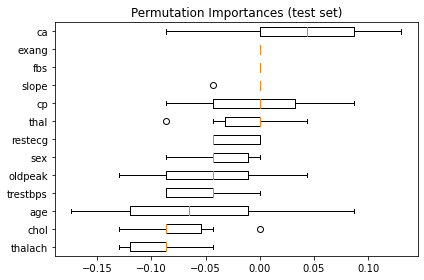

In [71]:
result = permutation_importance(model_tuned, xtest, ytest, n_repeats = 10, n_jobs = -1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert = False,
            labels = heart_disease.data.features.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

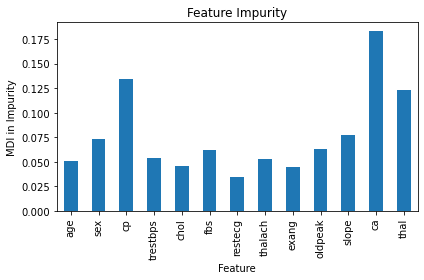

In [80]:
features = model_tuned.feature_importances_
model_features = pd.Series(features, index = heart_disease.data.features.columns)

fig, ax = plt.subplots()
model_features.plot.bar(ax = ax)
ax.set_title("Feature Impurity")
ax.set_ylabel("MDI in Impurity")
ax.set_xlabel("Feature")
fig.tight_layout()

From the Permutation importance plot, ca (number of diseased blood vessels) and thalach(maximum heart rate) seem to have the most important contribution to the model. This makes sense from the pair plots dispalyed earlier where thalach had a negative correlation with age and ca predicts whether or not someone has heart disease in the dataset.

Impurity measures the tendency of a given feature to spread out or become unpredictable, so it makes since that the number of diseased blood vessels has the highest impurity. We do not know exactly what parameters are responsible for heart disease, so the impurity in the data is the highest. 

Mushrooms

In [38]:
shrooms = fetch_ucirepo(id=73)
data2 = pd.DataFrame(shrooms.data.original)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64


Problem 7: Preprocess the data into a form for use for classification. Note most features are categorical and will need to be modified into numerical representations.

In [46]:
# turning strings into nums
X = data2.drop(['poisonous'], axis = 1)
X = pd.get_dummies(X)

y = data2['poisonous']
y = y.replace('e', 0, regex=True)
y = y.replace('p', 1, regex=True)

In [47]:
# Split data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 69)

Problem 8: Train a decision tree classifier to classify which mushrooms are poisonous and test it on a test set.

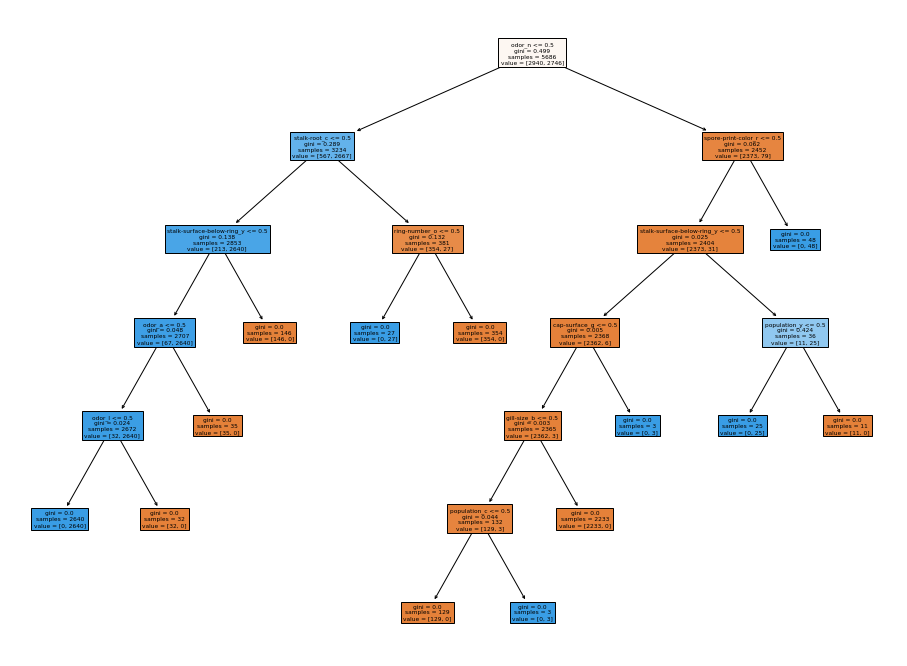

In [56]:
# plot a tree fit to the whole dataset
tree = DecisionTreeClassifier().fit(xtrain, ytrain)
plt.figure(figsize=(16,12))
plot_tree(tree, filled=True, feature_names = X.columns)
plt.show()


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:



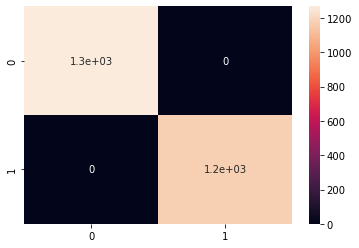

In [57]:
ypred_shroom = tree.predict(xtest)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(ytest, ypred_shroom))
print('\nConfusion Matrix:\n')

sns.heatmap(confusion_matrix(ytest, ypred_shroom), annot = True)
plt.show()

Problem 9: Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

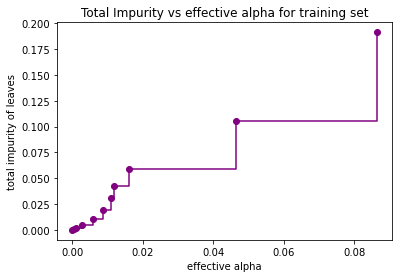

In [49]:
# pruning
prune = tree.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = prune.ccp_alphas, prune.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", color ='purple')
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

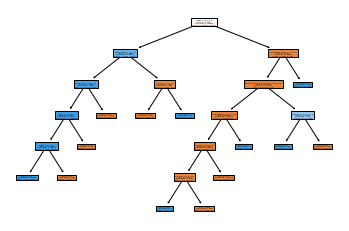

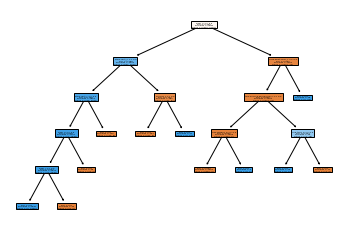

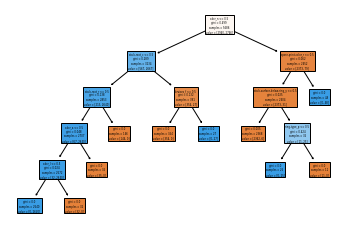

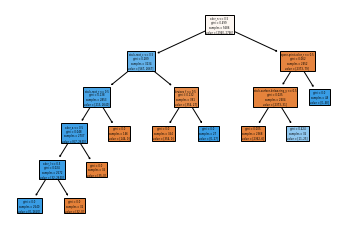

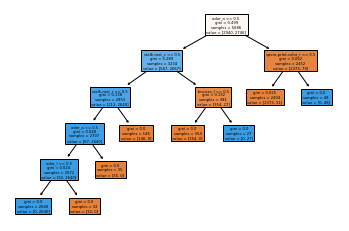

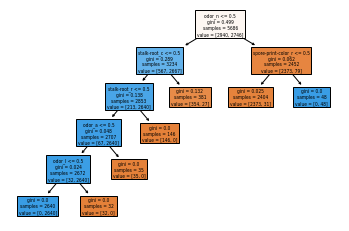

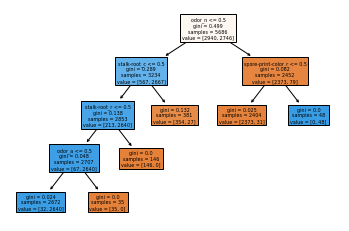

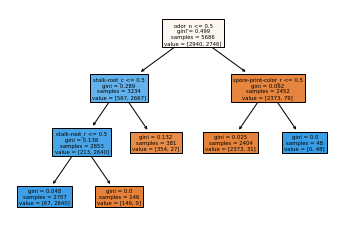

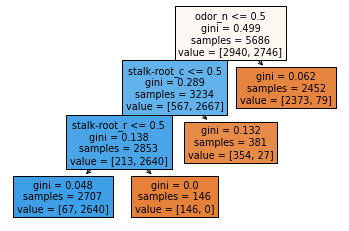

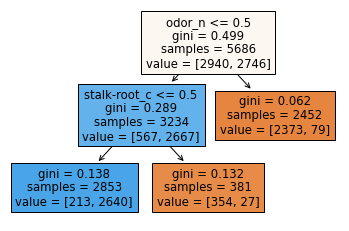

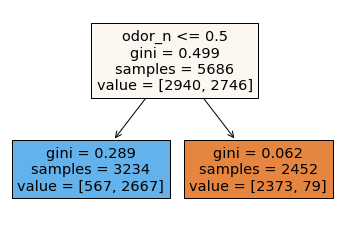

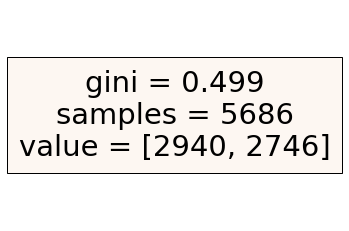

In [54]:
# train decision tree using effective alphas
vals = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(xtrain, ytrain)
    plot_tree(tree, filled=True, feature_names = X.columns)
    plt.show()

Problem 10: Train a XGBoost model to predict which mushrooms are poisonous and test it on a test set. Tune its hyperparameters to improve performance.

[0]	validation_0-logloss:0.43845
[1]	validation_0-logloss:0.29809
[2]	validation_0-logloss:0.20929
[3]	validation_0-logloss:0.14981
[4]	validation_0-logloss:0.10853
[5]	validation_0-logloss:0.07930
[6]	validation_0-logloss:0.05837
[7]	validation_0-logloss:0.04319
[8]	validation_0-logloss:0.03218
[9]	validation_0-logloss:0.02414
[10]	validation_0-logloss:0.01821
[11]	validation_0-logloss:0.01382
[12]	validation_0-logloss:0.01060
[13]	validation_0-logloss:0.00817
[14]	validation_0-logloss:0.00650
[15]	validation_0-logloss:0.00521
[16]	validation_0-logloss:0.00425
[17]	validation_0-logloss:0.00354
[18]	validation_0-logloss:0.00293
[19]	validation_0-logloss:0.00253
[20]	validation_0-logloss:0.00228
[21]	validation_0-logloss:0.00203
[22]	validation_0-logloss:0.00184
[23]	validation_0-logloss:0.00171
[24]	validation_0-logloss:0.00156
[25]	validation_0-logloss:0.00145
[26]	validation_0-logloss:0.00134
[27]	validation_0-logloss:0.00126
[28]	validation_0-logloss:0.00120
[29]	validation_0-loglos

<Figure size 432x288 with 0 Axes>

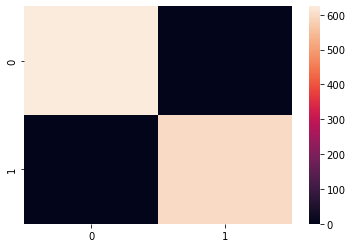

<Figure size 432x288 with 0 Axes>

In [59]:
# split data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 69)
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size = 0.5)

xgb = XGBClassifier(n_jobs = -1, seed = 69)

# fit training
xgb.fit(xtrain, ytrain, eval_set = [(xval, yval)])
ypred_xgb_train = xgb.predict(xtrain)

# check train set
print('\nTraining Classification Report:\n\n', classification_report(ytrain, ypred_xgb_train))

# predict test
ypred_xgb_test = xgb.predict(xtest)

# results
print('\nTesting Classification Report:\n\n', classification_report(ytest, ypred_xgb_test))
print('\nTesting Confusion Matrix:\n')
sns.heatmap(confusion_matrix(ytest, ypred_xgb_test))
plt.figure()

The performance is maximized since the accuracy is 100%. The dataset has a very strong correlation between color and whether or not the mushroom is poisonous; therefore, the resulting data may not be the best representation of actual mushrooms. Having a dataset that contains more look-alike mushrooms (especially similar colored mushrooms) could provide more meaningful results.